In [106]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('.\kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\kaggle\business.csv
.\kaggle\Clean_Dataset.csv
.\kaggle\economy.csv


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

%matplotlib inline

In [108]:
df=pd.read_csv('./kaggle/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<AxesSubplot:>

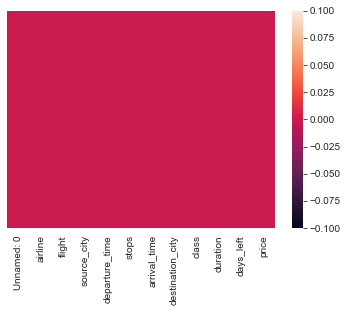

In [109]:
sns.heatmap(df.isna(),yticklabels=False)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [111]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [112]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [113]:
for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
flight                    --->            1561 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
stops                     --->               3 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [114]:
df=df.drop(['Unnamed: 0','flight'],axis=1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [115]:
df.shape

(300153, 10)

<AxesSubplot:xlabel='days_left', ylabel='price'>

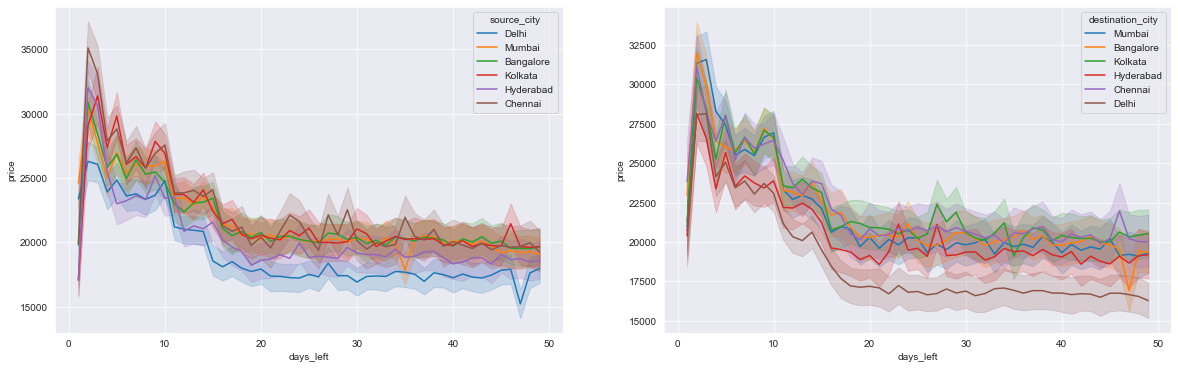

In [116]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])

<AxesSubplot:xlabel='days_left', ylabel='price'>

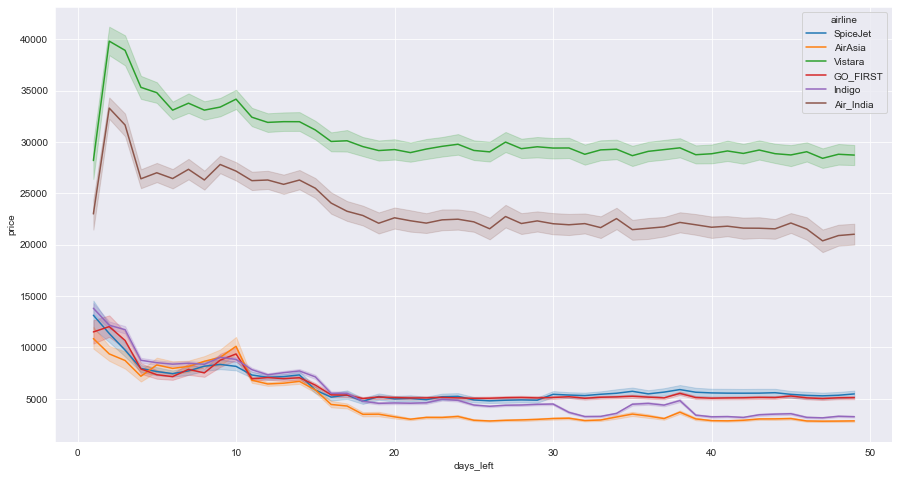

In [117]:
plt.figure(figsize=(15,8))
sns.lineplot(x='days_left',y='price',data=df,hue='airline')

<AxesSubplot:xlabel='airline', ylabel='price'>

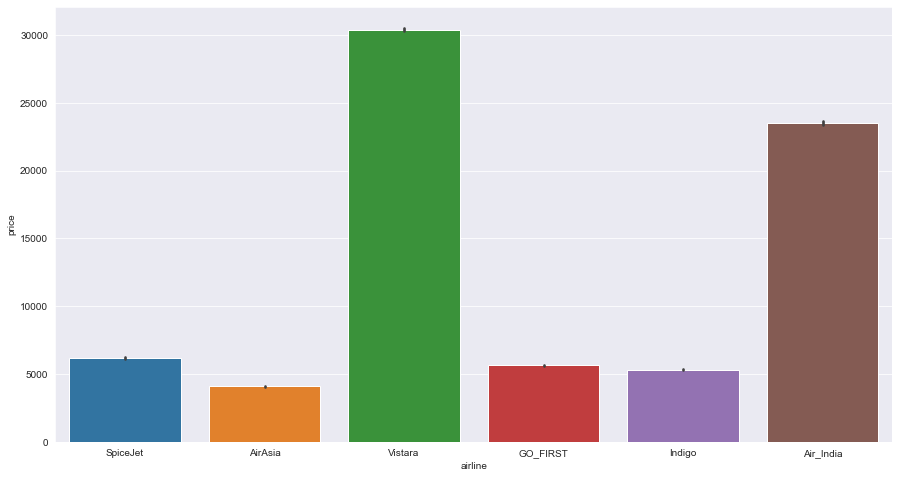

In [118]:
plt.figure(figsize=(15,8));
sns.barplot(x='airline',y='price',data=df)

<AxesSubplot:xlabel='destination_city', ylabel='price'>

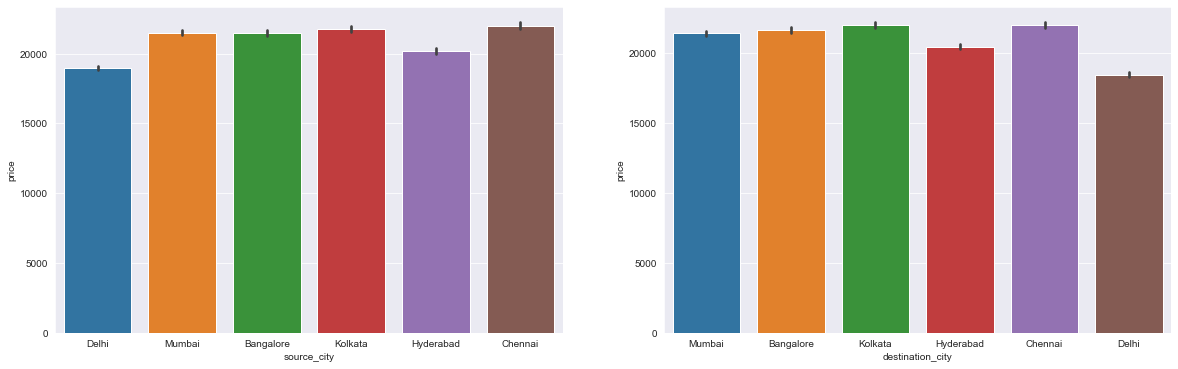

In [119]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='source_city',y='price',data=df,ax=ax[0])
sns.barplot(x='destination_city',y='price',data=df,ax=ax[1])

<AxesSubplot:xlabel='class', ylabel='price'>

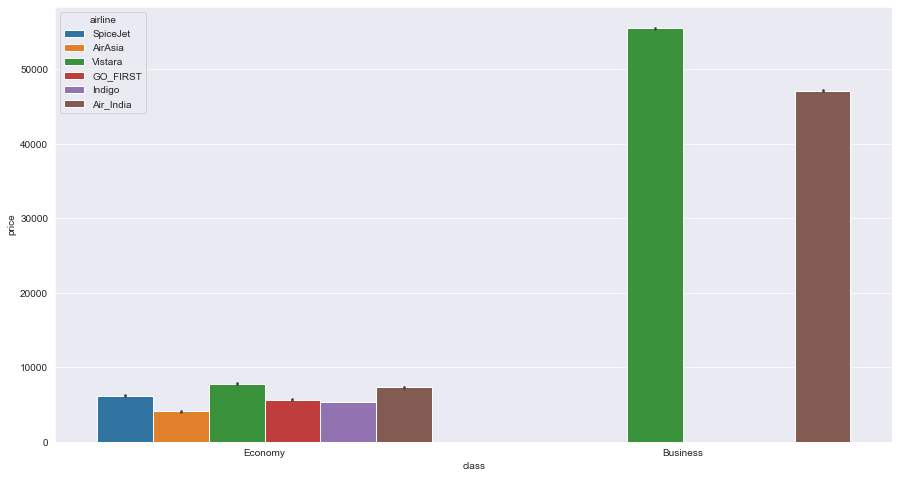

In [120]:
plt.figure(figsize=(15,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

<AxesSubplot:xlabel='stops', ylabel='price'>

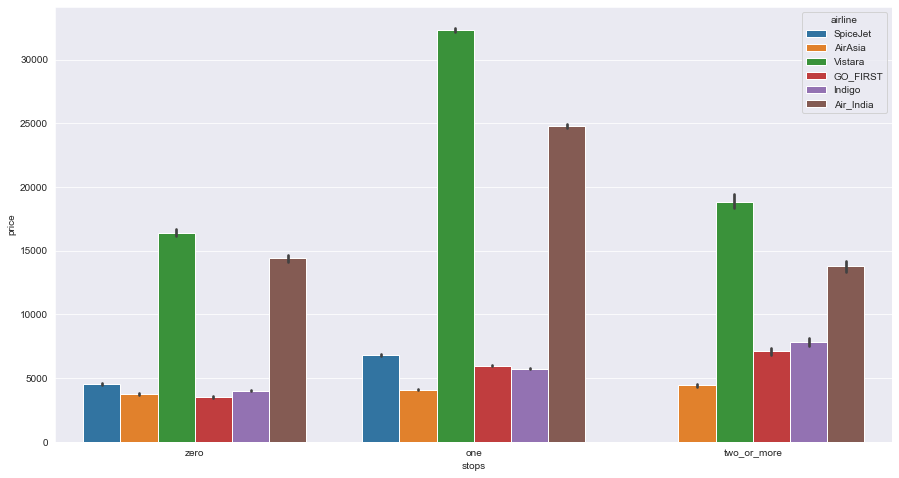

In [121]:
plt.figure(figsize=(15,8));
sns.barplot(x='stops',y='price',data=df,hue='airline')

In [122]:
df[['stops']].head()

,stops
0,zero
1,zero
2,zero
3,zero
4,zero


In [123]:
df[['stops']].value_counts()

stops      
one            250863
zero            36004
two_or_more     13286
dtype: int64

In [124]:
def mapper(x): 
    if(x=='zero'):
        return 0
    elif(x=='one'):
        return 1
    else:
        return 2

In [125]:
df['stops']=df['stops'].apply(mapper)

In [126]:
df[['stops']].head()

,stops
0,0
1,0
2,0
3,0
4,0


In [127]:
df[['stops']].value_counts()

stops
1        250863
0         36004
2         13286
dtype: int64

In [128]:
df['duration'].head()

0    2.17
1    2.33
2    2.17
3    2.25
4    2.33
Name: duration, dtype: float64

In [129]:
df['duration']=df['duration'].apply(lambda x: int(round(x*60)))

In [130]:
df['duration'].head()

0    130
1    140
2    130
3    135
4    140
Name: duration, dtype: int64

In [131]:
for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  int64 
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int64 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 22.9+ MB


In [133]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

for c in df.columns[0:]:  
    if(df[c].dtype == 'object'): 
        df[c] = encoder.fit_transform(df[c])
    else: 
        df[c] = df[c]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int32
 1   source_city       300153 non-null  int32
 2   departure_time    300153 non-null  int32
 3   stops             300153 non-null  int64
 4   arrival_time      300153 non-null  int32
 5   destination_city  300153 non-null  int32
 6   class             300153 non-null  int32
 7   duration          300153 non-null  int64
 8   days_left         300153 non-null  int64
 9   price             300153 non-null  int64
dtypes: int32(6), int64(4)
memory usage: 16.0 MB


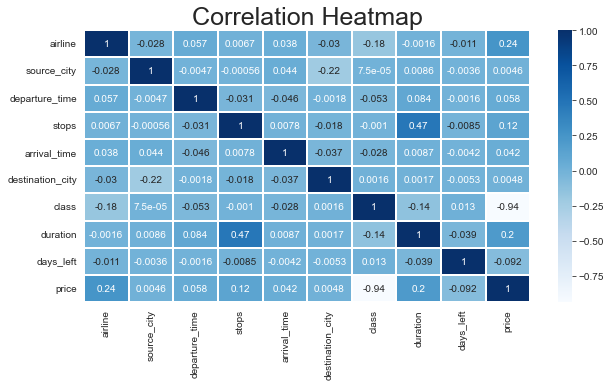

In [134]:
plt.figure(figsize=(10,5));
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.01);
plt.title('Correlation Heatmap', fontsize=25, fontweight=5);

In [135]:
# Özellik İlişkileri
from scipy.stats import kendalltau
c = df['price']
for i in df:
    d = df[i]
    corr, _ = kendalltau(c, d)
    print("{}".format(df[i].name) + " -> Kendall Rank correlation: %.5f\n" % corr)

airline -> Kendall Rank correlation: 0.21389

source_city -> Kendall Rank correlation: 0.01124

departure_time -> Kendall Rank correlation: 0.04010

stops -> Kendall Rank correlation: 0.18023

arrival_time -> Kendall Rank correlation: 0.02965

destination_city -> Kendall Rank correlation: 0.00973

class -> Kendall Rank correlation: -0.65486

duration -> Kendall Rank correlation: 0.21429

days_left -> Kendall Rank correlation: -0.18562

price -> Kendall Rank correlation: 1.00000



In [136]:
# Feature Selection Olan
X=df[['duration', 'class', 'airline']]
y=df[['price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [137]:
# Feature Selection Olan
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((270137, 3), (30016, 3), (270137, 1), (30016, 1))

In [138]:
# Feature Selection Olmadan
A=df.drop(['price'],axis=1)
b=df[['price']]

A_train,A_test,b_train,b_test=train_test_split(A,b,test_size=0.1,random_state=42)

In [139]:
# Feature Selection Olmadan
A_train.shape,A_test.shape,b_train.shape,b_test.shape

((270137, 9), (30016, 9), (270137, 1), (30016, 1))

In [140]:
# Feature Selection Olan
X_test.head(5)

,duration,class,airline
27131,1185,1,1
266857,590,0,5
141228,630,1,5
288329,870,0,5
97334,495,1,1


In [141]:
# Feature Selection Olmadan
A_test.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
27131,1,2,4,1,1,4,1,1185,40
266857,5,4,4,1,5,5,0,590,42
141228,5,4,4,1,5,0,1,630,41
288329,5,1,5,1,4,2,0,870,14
97334,1,0,0,1,5,5,1,495,20


In [142]:
y_test.head(5)

,price
27131,7366
266857,64831
141228,6195
288329,60160
97334,6578


In [143]:
# Feature Selection Olan
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((270137, 3), (270137, 1), (30016, 3), (30016, 1))

In [144]:
# Feature Selection Olmadan
A_train.shape,b_train.shape,A_test.shape,b_test.shape

((270137, 9), (270137, 1), (30016, 9), (30016, 1))

In [145]:
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor

In [146]:
reg_list=[
    LinearRegression(n_jobs=-1),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(n_estimators=100,n_jobs=-1),
    GradientBoostingRegressor(n_estimators=100),
    AdaBoostRegressor(n_estimators=100),
    KNeighborsRegressor(n_neighbors=2),
    Ridge(),
    MLPRegressor(hidden_layer_sizes=(15,10,5), max_iter = 300,activation = 'relu', solver = 'adam')
]

In [147]:
print("-"*21 + " Models " + "-"*21)
for reg in reg_list:
    print(reg)
    print("-"*50)   

--------------------- Models ---------------------
LinearRegression(n_jobs=-1)
--------------------------------------------------
DecisionTreeRegressor()
--------------------------------------------------
ExtraTreeRegressor()
--------------------------------------------------
RandomForestRegressor(n_jobs=-1)
--------------------------------------------------
GradientBoostingRegressor()
--------------------------------------------------
AdaBoostRegressor(n_estimators=100)
--------------------------------------------------
KNeighborsRegressor(n_neighbors=2)
--------------------------------------------------
Ridge()
--------------------------------------------------
MLPRegressor(hidden_layer_sizes=(15, 10, 5), max_iter=300)
--------------------------------------------------


In [148]:
%%time
# Feature Selection Olan
print("-"*16 + " Feature Selection " + "-"*15)
print("-"*50)
for reg in reg_list:
    reg_name=reg.__class__.__name__
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {reg_name} done")
    print("-"*50)

---------------- Feature Selection ---------------
--------------------------------------------------
Fitting LinearRegression done
--------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------
Fitting ExtraTreeRegressor done
--------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------
Fitting GradientBoostingRegressor done
--------------------------------------------------
Fitting AdaBoostRegressor done
--------------------------------------------------
Fitting KNeighborsRegressor done
--------------------------------------------------
Fitting Ridge done
--------------------------------------------------
Fitting MLPRegressor done
--------------------------------------------------
CPU times: total: 1min 37s
Wall time: 56 s


In [149]:
# Feature Selection Olan
score_dict={}

print("-"*16 + " Feature Selection " + "-"*15)

for reg in reg_list:
    
    reg_name = reg.__class__.__name__
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(f"Fitting {reg_name} done")
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test,pred, squared=False)}")

    
    
    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False)
    }
    
print("-"*50)

---------------- Feature Selection ---------------
--------------------------------------------------
Fitting LinearRegression done
R2 Score : 0.8917183471916545
Mean Absolute Error Score : 4743.497265789676
Mean Sqaured Error Score : 55760651.524664894
Root Mean Squared Error: 7467.305506316512
--------------------------------------------------
Fitting DecisionTreeRegressor done
R2 Score : 0.9395231997993716
Mean Absolute Error Score : 3636.321639124338
Mean Sqaured Error Score : 31143094.825886507
Root Mean Squared Error: 5580.599862549411
--------------------------------------------------
Fitting ExtraTreeRegressor done
R2 Score : 0.9395255645520512
Mean Absolute Error Score : 3636.1315421760446
Mean Sqaured Error Score : 31141877.074340574
Root Mean Squared Error: 5580.4907556899125
--------------------------------------------------
Fitting RandomForestRegressor done
R2 Score : 0.9395051170604595
Mean Absolute Error Score : 3637.5667651806084
Mean Sqaured Error Score : 31152406.701

In [150]:
%%time
# Feature Selection Olmadan
print("-"*14 + " Not Feature Selection " + "-"*13)

print("-"*50)
for reg in reg_list:
    reg_name=reg.__class__.__name__
    reg.fit(A_train,b_train.values.ravel())
    print(f"Fitting {reg_name} done")
    print("-"*50)

-------------- Not Feature Selection -------------
--------------------------------------------------
Fitting LinearRegression done
--------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------
Fitting ExtraTreeRegressor done
--------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------
Fitting GradientBoostingRegressor done
--------------------------------------------------
Fitting AdaBoostRegressor done
--------------------------------------------------
Fitting KNeighborsRegressor done
--------------------------------------------------
Fitting Ridge done
--------------------------------------------------
Fitting MLPRegressor done
--------------------------------------------------
CPU times: total: 6min 57s
Wall time: 5min 2s


In [151]:
# Feature Selection Olmadan
score_dictF={}
print("-"*14 + " Not Feature Selection " + "-"*13)

for reg in reg_list:
    
    reg_nameF = reg.__class__.__name__
    predF=reg.predict(A_test)
    
    print("-"*50)
    
    print(f"Fitting {reg_nameF} done")
    
    print(f"R2 Score : {r2_score(b_test,predF)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(b_test,predF)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(b_test,predF)}")
    print(f"Root Mean Squared Error: {mean_squared_error(b_test,predF, squared=False)}")

    
    
    score_dictF[reg_nameF]={
        "R2 Score":r2_score(b_test,predF),
        "Mean Absolute Error Score":mean_absolute_error(b_test,predF),
        "Mean Squared Error Score":mean_squared_error(b_test,predF),
        "Root Mean Squared Error": mean_squared_error(b_test,predF, squared=False)
    }
    
print("-"*50)

-------------- Not Feature Selection -------------
--------------------------------------------------
Fitting LinearRegression done
R2 Score : 0.9064230275971412
Mean Absolute Error Score : 4529.0582627555605
Mean Sqaured Error Score : 48188338.59254538
Root Mean Squared Error: 6941.782090540251
--------------------------------------------------
Fitting DecisionTreeRegressor done
R2 Score : 0.9769034699970904
Mean Absolute Error Score : 1145.2445695628999
Mean Sqaured Error Score : 11893774.499367004
Root Mean Squared Error: 3448.735202848575
--------------------------------------------------
Fitting ExtraTreeRegressor done
R2 Score : 0.9741480020635612
Mean Absolute Error Score : 1327.4332022921108
Mean Sqaured Error Score : 13312728.525686301
Root Mean Squared Error: 3648.6611963412415
--------------------------------------------------
Fitting RandomForestRegressor done
R2 Score : 0.9854594542341168
Mean Absolute Error Score : 1069.6817156142147
Mean Sqaured Error Score : 7487790.261

In [165]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
print("-"*38 + " Feature Selection " + "-"*37)
score_pd

-------------------------------------- Feature Selection -------------------------------------


,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,Root Mean Squared Error
ExtraTreeRegressor,0.939526,3636.131542,3.114188e+07,5580.490756
DecisionTreeRegressor,0.939523,3636.321639,3.114309e+07,5580.599863
RandomForestRegressor,0.939505,3637.566765,3.115241e+07,5581.434108
GradientBoostingRegressor,0.931426,3878.977389,3.531304e+07,5942.477286
MLPRegressor,0.927335,4015.795229,3.741955e+07,6117.151954
AdaBoostRegressor,0.920257,4396.547324,4.106445e+07,6408.155162
KNeighborsRegressor,0.907485,4366.329025,4.764159e+07,6902.288807
LinearRegression,0.891718,4743.497266,5.576065e+07,7467.305506
Ridge,0.891718,4743.546743,5.576066e+07,7467.305967


In [167]:
score_pdF=pd.DataFrame(score_dictF).transpose().sort_values("R2 Score",ascending=False)
print("-"*36 + " Not Feature Selection " + "-"*35)
score_pdF

------------------------------------ Not Feature Selection -----------------------------------


,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,Root Mean Squared Error
RandomForestRegressor,0.985459,1069.681716,7.487790e+06,2736.382697
DecisionTreeRegressor,0.976903,1145.244570,1.189377e+07,3448.735203
ExtraTreeRegressor,0.974148,1327.433202,1.331273e+07,3648.661196
GradientBoostingRegressor,0.951100,2987.129228,2.518163e+07,5018.129788
MLPRegressor,0.939661,3372.053448,3.107199e+07,5574.225578
AdaBoostRegressor,0.926753,3975.265487,3.771912e+07,6141.589092
LinearRegression,0.906423,4529.058263,4.818834e+07,6941.782091
Ridge,0.906423,4529.076638,4.818835e+07,6941.782821
KNeighborsRegressor,0.460802,10861.356127,2.776652e+08,16663.289107


----------------------------------------------------  Feature Selection -----------------------------------------------------


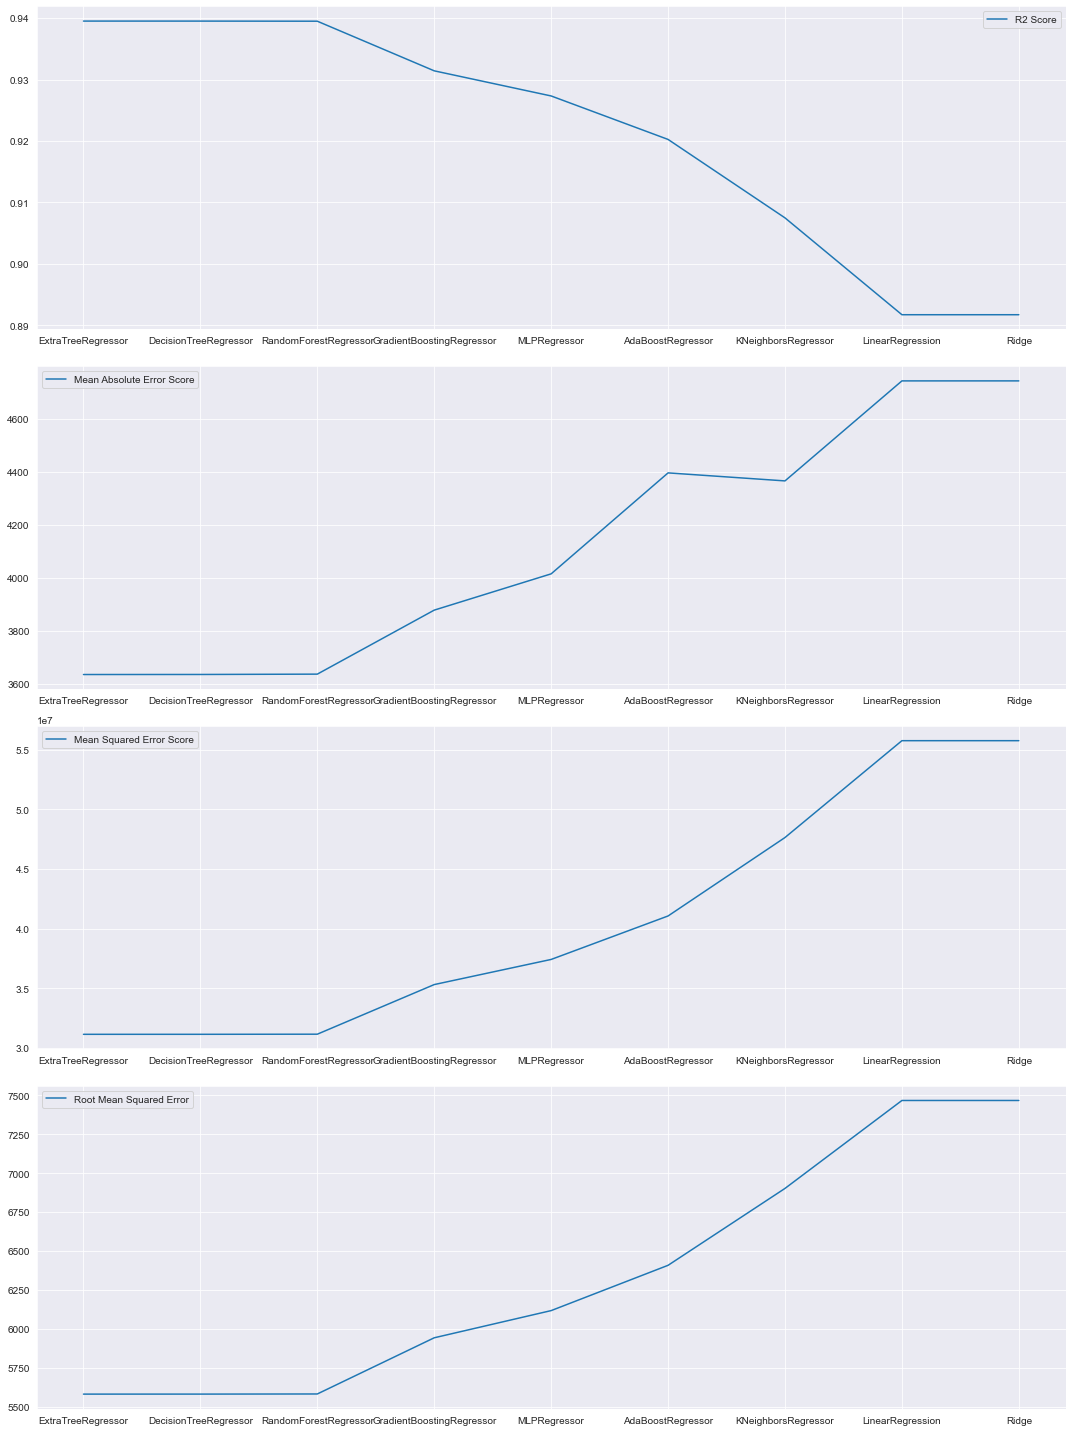

In [154]:
print("-"*52 + "  Feature Selection " + "-"*53)

fig,ax=plt.subplots(score_pd.shape[1],1,figsize=(15,20))

axi=0
for col in score_pd.columns:
    sns.lineplot(data=score_pd[[col]],ax=ax[axi])
    axi+=1
plt.tight_layout()

---------------------------------------------------  Not Feature Selection ----------------------------------------------------


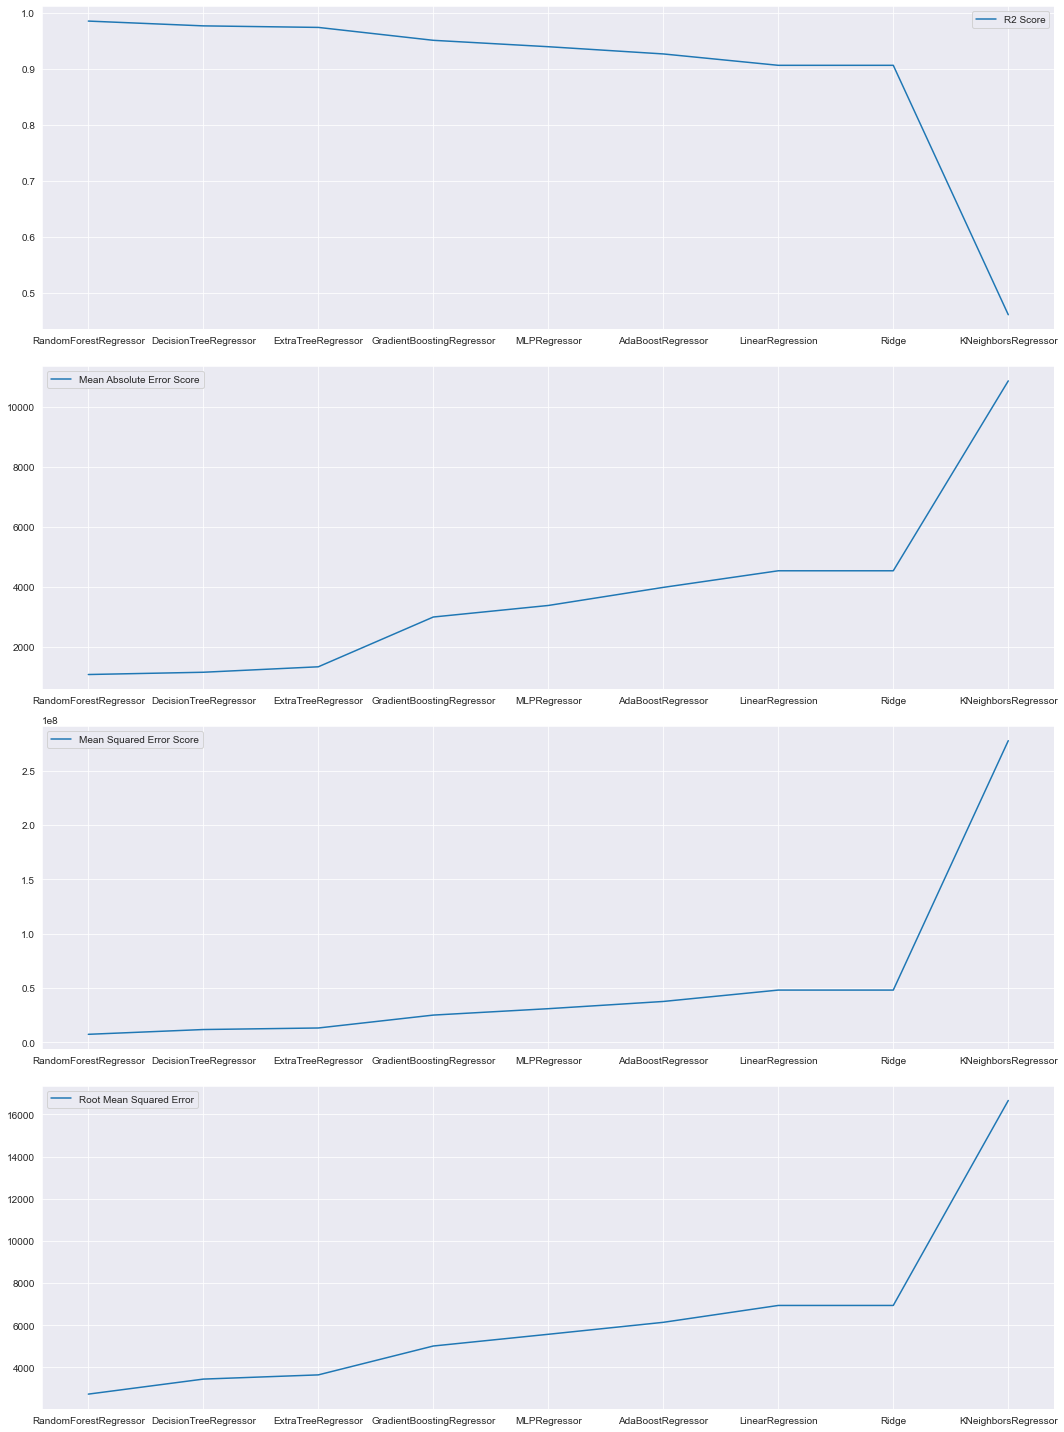

In [155]:
print("-"*51 + "  Not Feature Selection " + "-"*52)
fig,ax=plt.subplots(score_pdF.shape[1],1,figsize=(15,20))

axi=0
for col in score_pdF.columns:
    sns.lineplot(data=score_pdF[[col]],ax=ax[axi])
    axi+=1
plt.tight_layout()